In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("spam (1).csv" , encoding='ISO-8859-1')

In [7]:
data.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [9]:
data1=data.drop(columns=["Unnamed: 2","Unnamed: 3",	"Unnamed: 4"])

In [12]:
data1=data1.rename(columns={"v1":"label" , "v2":"text"})

In [14]:
data1.head(2)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [18]:
data1.value_counts().sum()

np.int64(5572)

In [19]:
data1.nunique()

,0
label,2
text,5169


In [25]:
data1['label'].value_counts()

,count
label,
ham,4825
spam,747


In [31]:
for i in range(5):
  print(data1['text'][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [32]:
!pip install nltk

In [34]:
!pip install nltk['stopword']

In [41]:
data1['label'][0]

'ham'

In [44]:
data1.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['label'] = le.fit_transform(data1['label'])

In [47]:
data1.head(2)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [48]:
data1.isnull().sum()

,0
label,0
text,0


In [53]:
data1.duplicated().sum()

np.int64(0)

In [52]:
data1=data1.drop_duplicates(keep='first')

In [55]:
data1.shape

(5169, 2)

([<matplotlib.patches.Wedge at 0x7e32e4782210>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

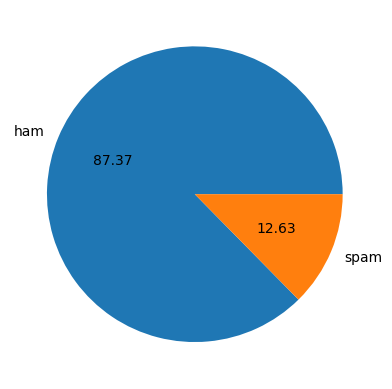

In [56]:
plt.pie(data1['label'].value_counts() ,labels=['ham' ,'spam'] ,autopct='%0.2f')

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
data1['num_character']=data1['text'].apply(len)

In [60]:
data1.head(2)

,label,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [62]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [66]:
data1['words']=data1['text'].apply(lambda x: len(nltk.word_tokenize((x))))

In [67]:
data1.head(2)

,label,text,num_character,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [68]:
data1['sentense']=data1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
data1.head(2)

,label,text,num_character,words,sentense
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [71]:
data1[['num_character' , 'words' ,'sentense']].describe()

,num_character,words,sentense
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
data1[data1['label']==1][['num_character' , 'words' ,'sentense']].describe()

,num_character,words,sentense
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [73]:
data1[data1['label']==0][['num_character' , 'words' ,'sentense']].describe()

,num_character,words,sentense
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_character', ylabel='Count'>

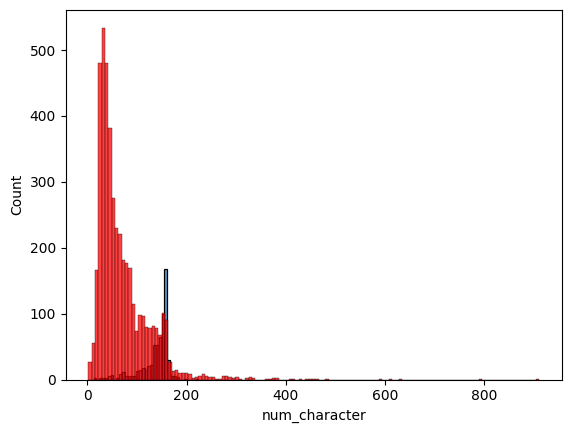

In [78]:
sns.histplot(data1[data1['label']==1]['num_character'])
sns.histplot(data1[data1['label']==0]['num_character'] ,color='r')



<Axes: xlabel='sentense', ylabel='Count'>

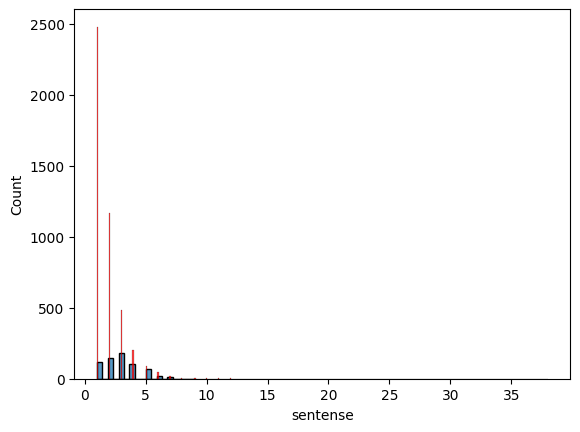

In [79]:
sns.histplot(data1[data1['label']==1]['sentense'])
sns.histplot(data1[data1['label']==0]['sentense'] ,color='r')



<Axes: xlabel='words', ylabel='Count'>

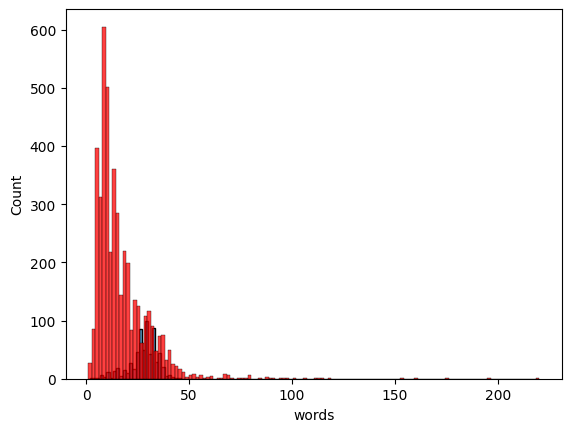

In [80]:
sns.histplot(data1[data1['label']==1]['words'])
sns.histplot(data1[data1['label']==0]['words'] ,color='r')

In [87]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [93]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
data1['transform_text']=data1['text'].apply(transform_text)

In [95]:
data1.head(2)

,label,text,num_character,words,sentense,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [97]:
from wordcloud import WordCloud
wc=WordCloud(height=500 , width=500 , min_font_size=10 , background_color='white')

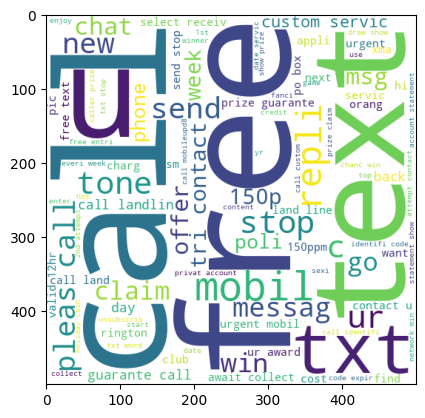

In [101]:
spam_wc=wc.generate(data1[data1['label'] ==1 ]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [103]:
from wordcloud import WordCloud
wc=WordCloud(min_font_size=10 , height=500 ,width=500 ,background_color='white')

In [106]:
spam_wc=wc.generate(data1[data1['label']==0]['transform_text'].str.cat(sep=" "))

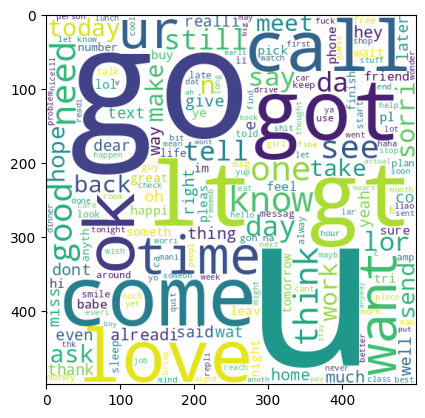

In [107]:
plt.imshow(spam_wc)

In [108]:
spam_corpus=[]
for msg in data1[data1['label']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [109]:
len(spam_corpus)

9939

In [112]:
ham_corpus=[]
for msg in data1[data1['label']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [113]:
len(ham_corpus)

35404

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

X=tfidf.fit_transform(data1['transform_text']).toarray()


In [116]:
X.shape

(5169, 3000)

In [118]:
y=data1['label'].values

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [123]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [125]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [127]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))